In [168]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('./deeplearning.mplstyle')
np.set_printoptions(precision=2)

In [169]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
X_train

array([[2104,    5,    1,   45],
       [1416,    3,    2,   40],
       [ 852,    2,    1,   35]])

In [170]:
y_train

array([460, 232, 178])

In [171]:
b_init = 785.1811367994083
w_init = np.array([0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


In [172]:
def predict_single_loop(x, w, b):
    n = x.shape[0]
    p = 0
    for i in range(n):
        p += (x[i] * w[i])
    return p + b

In [173]:
x_vec = X_train[0, :]
print(f"x_vec:{x_vec},{x_vec.shape}")

f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb:{f_wb},{f_wb.shape}")

x_vec:[2104    5    1   45],(4,)
f_wb:459.9999976194083,()


In [174]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost += (f_wb_i - y[i]) ** 2
    return cost / (2 * m)

In [175]:
cost = compute_cost(X_train, y_train, w_init, b_init)
print(cost)

1.5578904428966628e-12


In [176]:
def compute_gradient(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] += err * X[i][j]
        dj_db += err
    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db


In [177]:
tmp_dj_dw, tmp_dj_db = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db={tmp_dj_db}')
print(f'dj_dw={tmp_dj_dw}')

dj_db=-1.6739251501955248e-06
dj_dw=[-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]


In [178]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    print(num_iters)
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):

        dj_dw, dj_db = gradient_function(X, y, w, b)

        w -= (alpha * dj_dw)
        b -= (alpha * dj_db)

        if i < 100000:
            J_history.append(cost_function(X, y, w, b))

        # num_iters 1000   100     
        if i % math.ceil(num_iters / 10) == 0:
            print(f"iteration={i:4d} ----------- cost={J_history[-1]:8.4f}")

    return w, b, J_history



In [179]:
initial_w = np.zeros_like(w_init)
initial_b = 0.
iterations = 1000
alpha = 5.0e-7
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost, compute_gradient,
                                            alpha, iterations)

print(f"w_final={w_final},b_final={b_final:6.4f}")

1000
iteration=   0 ----------- cost=2529.4630
iteration= 100 ----------- cost=695.9903
iteration= 200 ----------- cost=694.9207
iteration= 300 ----------- cost=693.8604
iteration= 400 ----------- cost=692.8094
iteration= 500 ----------- cost=691.7676
iteration= 600 ----------- cost=690.7349
iteration= 700 ----------- cost=689.7112
iteration= 800 ----------- cost=688.6965
iteration= 900 ----------- cost=687.6906
w_final=[ 0.2   0.   -0.01 -0.07],b_final=-0.0022


In [180]:
m, n = X_train.shape
for i in range(m):
    print(f"prediction:{np.dot(X_train[i], w_final) + b_final :.2f},target value:{y_train[i]}")


prediction:426.19,target value:460
prediction:286.17,target value:232
prediction:171.47,target value:178


Text(0, 0.5, 'cost')

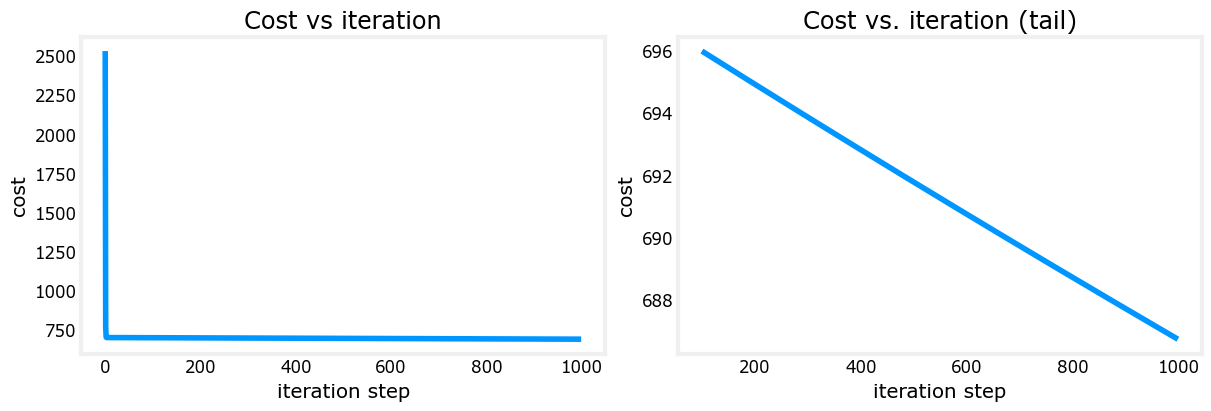

In [183]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
tmp = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs iteration") 
ax2.set_title("Cost vs. iteration (tail)")
ax1.set_xlabel('iteration step')
ax2.set_xlabel('iteration step')
ax1.set_ylabel('cost')
ax2.set_ylabel('cost')


